<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/Line_Blob_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies 

In [16]:
import cv2 
import pandas as pd  ,numpy as np 
import matplotlib.pyplot as plt

import math 


## Defining Helper Functions 

In [2]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

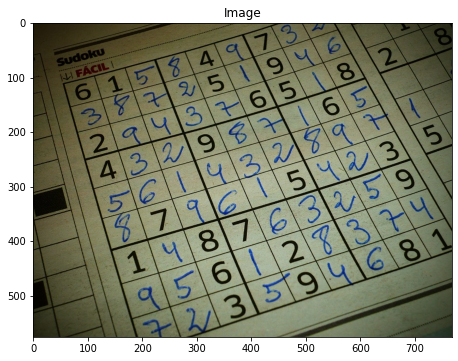

In [29]:
image = cv2.imread('/content/soduku.jpg')
imshow(image=image)

In [30]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

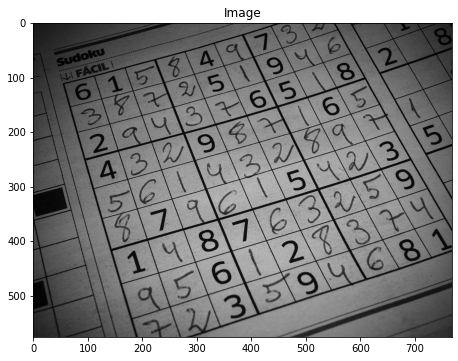

In [7]:
imshow(image=gray)

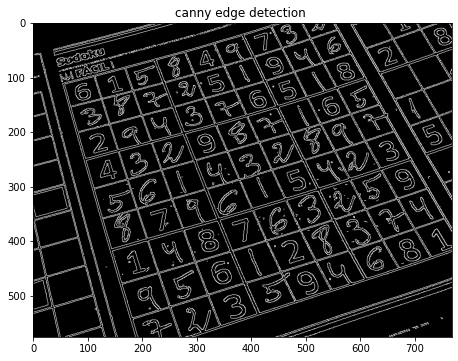

In [10]:
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
imshow('canny edge detection ',edges)

In [13]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

error: ignored

<Figure size 24480x720 with 0 Axes>

In [14]:
lines

array([[[   4.       ,    2.8797932]],

       [[   2.       ,    2.8797932]],

       [[ 637.       ,    1.2566371]],

       [[ -77.       ,    2.8274333]],

       [[ 507.       ,    1.2740903]],

       [[-476.       ,    2.6179938]],

       [[ 505.       ,    1.2740903]],

       [[-130.       ,    2.7925267]],

       [[ 379.       ,    1.2915436]],

       [[ 323.       ,    1.2915436]],

       [[ -21.       ,    2.86234  ]],

       [[ 634.       ,    1.2566371]],

       [[ -24.       ,    2.86234  ]],

       [[ 574.       ,    1.2566371]],

       [[-387.       ,    2.6703537]],

       [[  21.       ,    2.8797932]],

       [[-284.       ,    2.7052603]],

       [[-429.       ,    2.6354473]],

       [[ -75.       ,    2.8274333]],

       [[-128.       ,    2.7925267]],

       [[ 381.       ,    1.2915436]],

       [[-485.       ,    2.6354473]],

       [[-282.       ,    2.7052603]],

       [[ 121.       ,    1.3089969]],

       [[ 384.       ,    1.2740903]],



In [24]:
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

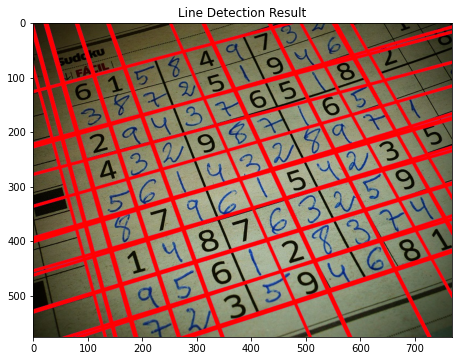

In [25]:
imshow('Line Detection Result',image)

In [32]:
# Grayscale and Canny Edges extracted
image = cv2.imread('content/soduku.jpg')
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

imshow('Probabilistic Hough Lines', image)

error: ignored